In [0]:
import torch
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from PIL import Image
import os
import matplotlib.pyplot as plt

import numpy as np

In [0]:
def make_training_data(root, subdirectories, transformations):
  """
  This Function convert your image dataset to pytorch tensors, you have to provide \n
  root:  directory where your dataset exists, the classes you want to
  classify should be in seperate folders e.g. cats images in a cat folder in
  the root as well as other classes. \n
  subdirectories: a list of subdirectory names e.g. [ 'cat', 'dog' ]\n
  transformations: pytorch transformations
  """
  data = []
  for idx in tqdm(range(len(subdirectories))):
    subDirPath = os.path.join(root, subdirectories[idx])
    for f in os.listdir(subDirPath):
      filePath = os.path.join(subDirPath, f)
      img = Image.open(filePath)
      tensor_image = transformations(img)
      data.append([ tensor_image, idx])
  return data
  



In [0]:
model = models.resnet50(pretrained=True)

In [0]:
def replace_last_layer(model, out_features):
  model.fc = torch.nn.Sequential(
      torch.nn.Linear(in_features=2048, out_features=out_features),
      torch.nn.LogSoftmax(dim=1)
  )


In [0]:
replace_last_layer(model, 3)

In [0]:
class CustomDataset(Dataset):
  def __init__(self, data):
    self.data = data

  def __len__(self):
    return len(self.data)
  
  def __getitem__(self, idx):
    return self.data[idx]

In [0]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [0]:
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


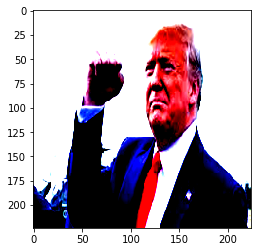

In [0]:
for idx, (data, target) in enumerate(trainloader):
  break

plt.imshow(np.transpose(data[0], (1,2, 0)))
print(target[0])

In [0]:
target[0]

tensor(0)

In [0]:
data = make_training_data('/content/data', ['trump', 'obama', 'hilliary'], transformations) 
dataset = CustomDataset(data)

100%|██████████| 3/3 [00:00<00:00, 56.21it/s]


In [0]:
criterion = torch.nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [0]:
model.train()
batch_size = 2
EPOCHS = 100
train_loss = 0

trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(EPOCHS):
  for idx, (data, target) in enumerate(trainloader):
    optimizer.zero_grad()

    pred = model(data)
    loss = criterion(pred, target)
    loss.backward()
    optimizer.step()

    print("EPOCH:{} LOSS: {}".format(epoch, loss.item()))




EPOCH:0 LOSS: 0.663434624671936
EPOCH:0 LOSS: 0.644077718257904
EPOCH:0 LOSS: 1.0248512029647827
EPOCH:0 LOSS: 0.4404187798500061
EPOCH:0 LOSS: 1.796518087387085
EPOCH:0 LOSS: 1.0456775426864624
EPOCH:0 LOSS: 0.6018615961074829
EPOCH:0 LOSS: 1.2222487926483154
EPOCH:1 LOSS: 0.21466141939163208
EPOCH:1 LOSS: 0.611116886138916
EPOCH:1 LOSS: 0.3207753002643585
EPOCH:1 LOSS: 1.675689697265625
EPOCH:1 LOSS: 1.6133790016174316
EPOCH:1 LOSS: 1.7996439933776855
EPOCH:1 LOSS: 1.9799045324325562
EPOCH:1 LOSS: 0.9261469841003418
EPOCH:2 LOSS: 0.2932092249393463
EPOCH:2 LOSS: 0.18489694595336914
EPOCH:2 LOSS: 1.3658215999603271
EPOCH:2 LOSS: 0.5220807194709778
EPOCH:2 LOSS: 0.3838006854057312
EPOCH:2 LOSS: 0.32931089401245117
EPOCH:2 LOSS: 0.40527671575546265
EPOCH:2 LOSS: 2.357593059539795
EPOCH:3 LOSS: 0.2751631438732147
EPOCH:3 LOSS: 0.5512665510177612
EPOCH:3 LOSS: 1.8707056045532227
EPOCH:3 LOSS: 1.2318350076675415
EPOCH:3 LOSS: 1.2564024925231934
EPOCH:3 LOSS: 1.7274482250213623
EPOCH:3 LOSS

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Trump


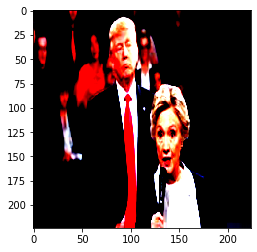

In [0]:
model.eval()

img = Image.open('/content/test.jpg')
tns_img = transformations(img)
output = model(tns_img.view(-1, 3, 224, 224))

plt.imshow(np.transpose(tns_img, (1,2, 0)))

if (output.argmax() == 0):
  print('Trump')

elif(output.argmax() == 1):
  print('Obama')

elif(output.argmax() == 2):
  print('Hilliary')